# Hyperparameter tuning

A Machine Learning model is defined as a mathematical model with several parameters that need to be learned from the data. By training a model with existing data, we can fit the model parameters. However, there are some parameters, known as hyperparameters, that cannot be directly learned from the regular training process. These parameters express “higher-level” structural settings for the model, and they are usually fixed before the actual training process begins.

Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters. Hyperparameters are settings that control the learning process of the model, such as the learning rate, the number of neurons in a neural network, or the kernel size in a support vector machine. 


**What are Hyperparameters?**
In the context of machine learning, hyperparameters are configuration variables that are set before the training process of a model begins. They control the learning process itself, rather than being learned from the data. Hyperparameters are often used to tune the performance of a model, and they can have a significant impact on the model’s accuracy, generalization, and other metrics.
**Hyperparameter Tuning techniques**
Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. The two best strategies for Hyperparameter tuning are:

**GridSearchCV** GridSearchCV exhaustively considers all parameter combinations. This is a good technique to use when you have a relatively small number of hyperparameters to tune.
**RandomizedSearchCV** RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution. This is a good technique to use when you have a large number of hyperparameters to tune.
**Bayesian Optimization** Bayesian optimization is a probabilistic model-based optimization method, which is particularly well-suited for optimizing black-box functions. It is a good technique to use when you have a large number of hyperparameters to tune.
**Gradient based optimization techniques** These techniques are used to optimize the hyperparameters of a model by using the gradient of the loss function with respect to the hyperparameters.


# Cross validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

# Grid Search Cross Validation (CV)

In [1]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
from sklearn.datasets import load_iris
iris=load_iris()


In [3]:
X=iris.data
y=iris.target

In [4]:
model=RandomForestClassifier(n_estimators=100,random_state=0)

In [5]:
# create the parameter grid
param_grid = {
    'n_estimators': [50,100,150, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 9,10],
    'criterion' :['gini', 'entropy']
}

In [6]:
# setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                          cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [7]:
# fit the model
grid_search.fit(X, y)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
840 fits failed out of a total of 2520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
396 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 300, 400, 500, 600,
                                          700, 800, 900, 1000]},
             scoring='accuracy', verbose=2)

In [8]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


# Randomized Search Cross Validation (CV)

In [9]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
# Load the dataset
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target
model=RandomForestClassifier(n_estimators=100,random_state=0)
# create the parameter grid
param_grid = {
    'n_estimators': [50,100,150, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 9,10],
    'criterion' :['gini', 'entropy']
}
grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                          cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         400, 500, 600, 700,
                                                         800, 900, 1000]},
                   scoring='accuracy', verbose=2)

In [11]:
print(grid_search.best_params_)

{'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'entropy'}


**Types of CV**
k-fold cross-validation\
train-test split\
leave-one-out cross-validation (LOOCV)\
stratified cross-validation\
Times series cross-validation\
Group cross-validation

**Example of K-fold cross validation**
In k-fold cross-validation, the available data is divided into k equal parts or "folds". The model is then trained on k-1 of the folds and validated on the remaining fold. This process is repeated k times, with each fold being used once as the validation set. The results from each fold are then averaged to obtain an overall estimate of the model's performance.\
**Summary:**\
In summary, cross-validation is a powerful technique for evaluating the performance of machine learning models and can help to ensure that our models are accurate, reliable, and able to generalize to new data.


In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [13]:
iris=load_iris()

In [14]:
nb=GaussianNB()

In [15]:
# perform k fold cross validation with 5 folds
scores=cross_val_score(nb, iris.data, iris.target, cv=5, scoring='accuracy')

In [16]:
print(f"Score for each cross validation: {scores}")
print(f"Mean score: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

Score for each cross validation: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean score: 0.9533333333333334
Standard deviation: 0.02666666666666666


**K-fold Cross Validation vs. train_test split**
K-fold cross-validation and train-test split are two popular techniques used in machine learning to evaluate the performance of a model. Here are some key differences between the two:
**Data usage:**
In k-fold cross-validation, the data is split into k equal parts or "folds". The model is trained on k-1 of the folds and validated on the remaining fold. This process is repeated k times, with each fold being used once as the validation set.

In contrast, train-test split divides the data into two parts: a training set and a testing set, typically with a ratio of 70-30 or 80-20. The model is trained on the training set and evaluated on the testing set.

**Data size:**
K-fold cross-validation is often used when the dataset is relatively small, as it allows for better use of the available data.

In contrast, train-test split is typically used when the dataset is larger, as it is faster to implement and may be sufficient for evaluating the model's performance.

**Performance estimation:**
K-fold cross-validation provides a more accurate estimate of the model's performance, as it evaluates its performance on multiple independent subsets of the data. This helps to reduce the variance of the performance estimate and detect overfitting.

In contrast, train-test split provides a less accurate estimate of the model's performance, as it depends on the specific subset of the data used for testing.

**Computation time:**
K-fold cross-validation can be computationally expensive, as it requires training and validating the model k times.

In contrast, train-test split is faster to implement and requires training and validating the model only once.

Overall, k-fold cross-validation is a more robust and accurate technique for evaluating the performance of a machine learning model, especially when the dataset is relatively small

Train-test split is a faster and simpler technique that can be used when the dataset is larger and a quick estimate of the model's performance is needed.

# How to plot k-fold cross-validation

In [18]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [28]:
clf=DecisionTreeClassifier()

In [29]:
scores=cross_val_score(clf, X, y, cv=8, scoring='accuracy')

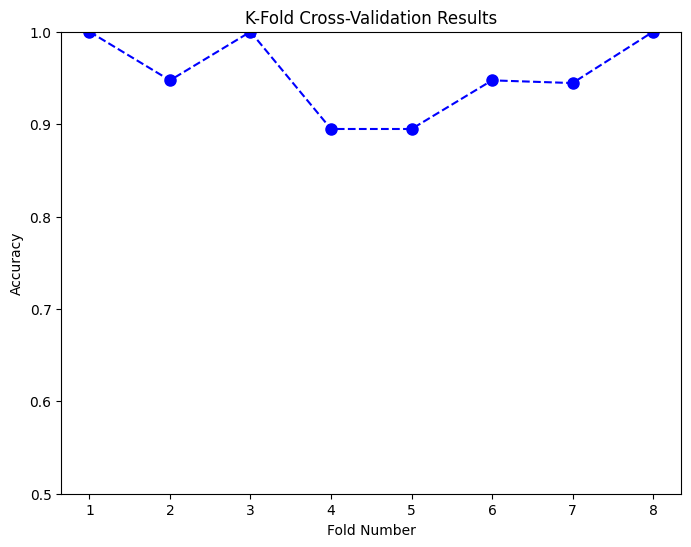

In [33]:
# plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(1,9), scores[:8], color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=8)
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.show()